<a href="https://colab.research.google.com/github/a72572993/samurai-finalkadai/blob/main/SAMURAI%E6%9C%80%E7%B5%82%E8%AA%B2%E9%A1%8C_1_AkaneYoshida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 最終課題
https://drive.google.com/file/d/1TJibi0yvD1h7aO_LZXI_cn2wd_PoRxmc/view



エゾバフンウニの漁獲量を時系列分析で予測する

https://www.pref.hokkaido.lg.jp/sr/sum/03kanrig/sui-toukei/suitoukei.html

https://www.jma-net.go.jp/sapporo/kaiyou/engan/data/engandata.html

1. 課題把握とゴールの設定
2. 必要なライブラリのインポート
3. データの準備
4. 予測モデルの学習
5. 予測
6. 予測の評価
7. 設定したゴールの回答


1. 課題把握とゴールの設定

【課題】
エゾバフンウニの漁獲量減少について

毎年ふるさと納税で、北海道礼文町のエゾバフンウニを購入していますが、2024年は漁獲量が少ないとのことで例年より1か月遅く納品されました。
年々進む地球温暖化に伴い海産物の漁獲量に異変が生じているように感じているため、北海道の過去のエゾバフンウニの漁獲量をもとに時系列分析で未来の漁獲量を予測し、来年のふるさと納税もエゾバフンウニを購入するかを決めたいと思いました。


In [85]:
#2. 必要なライブラリのインポート
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [86]:
#3. データの準備
df = pd.read_csv('/content/data_uni_2.csv')
df

#元のエゾバフンウニの漁獲量データは年間の数量のみの記載のため、当初は年+0101の月日を組み合わせて実施したが予測がうまくできなかったため、
#強引だが、年間数量を日割りしたデータを用意し、読み込んでいる。

#日割りの方法：csv上で実施
#①ds列に1985/1/1から2021/12/31までの日付を入力（ソートですぐに可能）
#②ExcelのYEAR関数を使用してyear列にds列の日付をもとに年のみを表示
#③ExcelのCOUNTIF関数(分母：各年の日数)、XLOOKUP関数(分子：別シートの年間数量を、year列をもとに付与)を使用してy列の数字を付与

,year,ds,y,seawater temperature
0,1985,1985/1/1,2.243836,4.214828
1,1985,1985/1/2,2.243836,4.088621
2,1985,1985/1/3,2.243836,4.018276
3,1985,1985/1/4,2.243836,3.974483
4,1985,1985/1/5,2.243836,3.957586
...,...,...,...,...
13509,2021,2021/12/27,0.660274,7.167586
13510,2021,2021/12/28,0.660274,6.851034
13511,2021,2021/12/29,0.660274,6.538621
13512,2021,2021/12/30,0.660274,6.296552


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13514 entries, 0 to 13513
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  13514 non-null  int64  
 1   ds                    13514 non-null  object 
 2   y                     13514 non-null  float64
 3   seawater temperature  13514 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 422.4+ KB


In [88]:
#無効：年間データのため、各年に-01-01をつけ足して分析してみようとしたが、予測でエラーとなったため。

#年のデータをdatetimeに変換し、月と日はデフォルトで1月1日とする
# years = df['ds']

# ds = pd.to_datetime(years.astype(str) + '-01-01')
# print(ds)

<Axes: xlabel='ds', ylabel='y'>

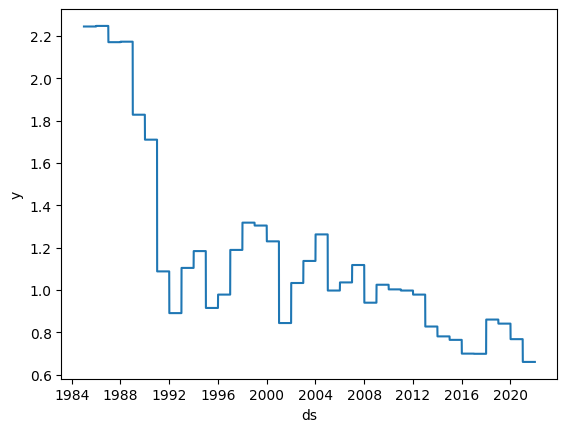

In [89]:
#エゾバフンウニウニの漁獲量推移を可視化
time = pd.to_datetime(df['ds'])
sns.lineplot(x=time, y=df['y'])


In [90]:
#4．予測モデルの学習

#Prophetクラスをインポートし、インスタンス化
from prophet import Prophet
model = Prophet()

#学習
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/b89uwdgk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/c69luvva.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99933', 'data', 'file=/tmp/tmpgzdcr303/b89uwdgk.json', 'init=/tmp/tmpgzdcr303/c69luvva.json', 'output', 'file=/tmp/tmpgzdcr303/prophet_modeluz_xbc3y/prophet_model-20240813030633.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:06:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:06:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [103]:
#5．予測

# future = model.make_future_dataframe(periods=4, freq='YS')
# future

#1か月間隔・毎月初日・向こう4年（365*4+1)という枠組みで予測したいため、periodsパラメータに1461、freqパラメータにDを指定
future = model.make_future_dataframe(periods=1461, freq='D')
future

,ds
0,1985-01-01
1,1985-01-02
2,1985-01-03
3,1985-01-04
4,1985-01-05
...,...
14970,2025-12-27
14971,2025-12-28
14972,2025-12-29
14973,2025-12-30


In [104]:
#predictメソッドで予測
forecast = model.predict(future)
forecast


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1985-01-01,2.261088,2.173393,2.338860,2.261088,2.261088,-0.002622,-0.002622,-0.002622,-0.000287,-0.000287,-0.000287,-0.002335,-0.002335,-0.002335,0.0,0.0,0.0,2.258466
1,1985-01-02,2.261041,2.175723,2.339849,2.261041,2.261041,-0.004705,-0.004705,-0.004705,-0.000175,-0.000175,-0.000175,-0.004530,-0.004530,-0.004530,0.0,0.0,0.0,2.256336
2,1985-01-03,2.260994,2.171580,2.342146,2.260994,2.260994,-0.006612,-0.006612,-0.006612,0.000065,0.000065,0.000065,-0.006677,-0.006677,-0.006677,0.0,0.0,0.0,2.254382
3,1985-01-04,2.260947,2.166811,2.333707,2.260947,2.260947,-0.008570,-0.008570,-0.008570,0.000182,0.000182,0.000182,-0.008752,-0.008752,-0.008752,0.0,0.0,0.0,2.252377
4,1985-01-05,2.260900,2.167658,2.330379,2.260900,2.260900,-0.010531,-0.010531,-0.010531,0.000201,0.000201,0.000201,-0.010732,-0.010732,-0.010732,0.0,0.0,0.0,2.250369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14970,2025-12-27,0.739017,-0.243469,1.743772,-0.223968,1.740358,0.009177,0.009177,0.009177,0.000201,0.000201,0.000201,0.008976,0.008976,0.008976,0.0,0.0,0.0,0.748194
14971,2025-12-28,0.739010,-0.244252,1.787639,-0.225383,1.741525,0.006944,0.006944,0.006944,0.000003,0.000003,0.000003,0.006942,0.006942,0.006942,0.0,0.0,0.0,0.745955
14972,2025-12-29,0.739004,-0.241634,1.760646,-0.226663,1.742691,0.004836,0.004836,0.004836,0.000011,0.000011,0.000011,0.004824,0.004824,0.004824,0.0,0.0,0.0,0.743840
14973,2025-12-30,0.738998,-0.258061,1.760393,-0.227875,1.744296,0.002361,0.002361,0.002361,-0.000287,-0.000287,-0.000287,0.002648,0.002648,0.002648,0.0,0.0,0.0,0.741359


In [105]:
#予測したい項目を抽出
# ds	日付
# yhat	エゾバフンウニ漁獲量の予測値
# yhat_lower	予測値の不確実性区間の下限
# yhat_upper	予測値の不確実性区間の上限

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]


,ds,yhat,yhat_lower,yhat_upper
0,1985-01-01,2.258466,2.173393,2.338860
1,1985-01-02,2.256336,2.175723,2.339849
2,1985-01-03,2.254382,2.171580,2.342146
3,1985-01-04,2.252377,2.166811,2.333707
4,1985-01-05,2.250369,2.167658,2.330379
...,...,...,...,...
14970,2025-12-27,0.748194,-0.243469,1.743772
14971,2025-12-28,0.745955,-0.244252,1.787639
14972,2025-12-29,0.743840,-0.241634,1.760646
14973,2025-12-30,0.741359,-0.258061,1.760393


/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


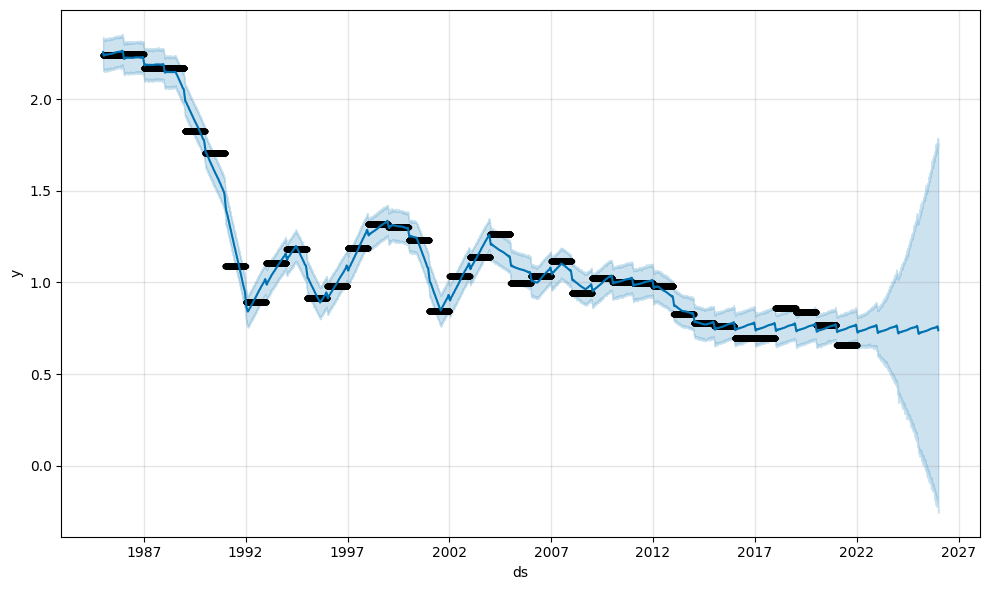

In [106]:
#予測を可視化
fig_forecast = model.plot(forecast)


In [107]:
#6. 予測の評価
#過去のデータから学習データとテストデータを取得し、学習データで予測モデルを学習
#テストデータの実際の値と、予測モデルによる予測値の誤差にもとづく評価が可能
#cutoffs:いつまでのデータを学習データとするかという期限の日付
#cutoffsを2014/12/1, 2015/12/1, 2016/12/1, 2017/12/1、horizonを4年とした場合

cutoffs = pd.to_datetime(['2014-12-01', '2015-12-01', '2016-12-01', '2017-12-01'])


In [108]:
#テストパターンを作成するcross_validation関数をインポート
from prophet.diagnostics import cross_validation


In [109]:
#horizon	cutoffs翌日以降のテスト期間
#うるう年も考慮し、365日×4+1日 = 1461日
df_cv = cross_validation(model, horizon = '1461days', cutoffs=cutoffs)


  0%|          | 0/4 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/hzygemuc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/jk5vesxp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=25778', 'data', 'file=/tmp/tmpgzdcr303/hzygemuc.json', 'init=/tmp/tmpgzdcr303/jk5vesxp.json', 'output', 'file=/tmp/tmpgzdcr303/prophet_model7w6dq5_x/prophet_model-20240813030900.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:09:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:09:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/c6oao_re.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgzdcr303/i8k82s6c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [110]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-12-02,0.832051,0.747016,0.914713,0.780822,2014-12-01
1,2014-12-03,0.832847,0.752381,0.912628,0.780822,2014-12-01
2,2014-12-04,0.833823,0.748400,0.914223,0.780822,2014-12-01
3,2014-12-05,0.834791,0.754268,0.915335,0.780822,2014-12-01
4,2014-12-06,0.835500,0.755117,0.922251,0.780822,2014-12-01
...,...,...,...,...,...,...
5839,2021-11-27,0.436430,-0.785359,1.433044,0.660274,2017-12-01
5840,2021-11-28,0.436198,-0.774685,1.420875,0.660274,2017-12-01
5841,2021-11-29,0.436184,-0.806660,1.453660,0.660274,2017-12-01
5842,2021-11-30,0.436007,-0.784015,1.433529,0.660274,2017-12-01


In [111]:
#評価指標を算出するperformance_metrics関数をインポート
from prophet.diagnostics import performance_metrics

#引数にdf_cvを指定して、performance_metrics関数を実行
df_p = performance_metrics(df_cv)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,146 days,0.013993,0.118294,0.074402,0.091828,0.049899,0.102731,0.801370
1,147 days,0.014104,0.118762,0.074789,0.092275,0.049899,0.103272,0.799658
2,148 days,0.014216,0.119229,0.075176,0.092723,0.049899,0.103814,0.797945
3,149 days,0.014327,0.119694,0.075565,0.093173,0.049899,0.104360,0.796233
4,150 days,0.014438,0.120159,0.075956,0.093625,0.049899,0.104908,0.794521


In [112]:
#horizon列を月単位で表示し、新たな行の構成で各評価指標を算出
#performance_metrics関数の実行時に、monthlyパラメータにTrueを指定して、horizon列を月単位で表
df_p = performance_metrics(df_cv, monthly=True)
df_p.head()


,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,4,0.014432,0.120133,0.075858,0.093490,0.057674,0.104768,0.794521
1,5,0.017273,0.131428,0.085630,0.104721,0.034075,0.118418,0.750428
2,6,0.017379,0.131828,0.085978,0.105158,0.035541,0.118954,0.750364
3,7,0.017466,0.132159,0.086500,0.105834,0.037251,0.119689,0.750000
4,8,0.017548,0.132468,0.086935,0.106403,0.086385,0.120314,0.750000


<Axes: xlabel='horizon', ylabel='mse'>

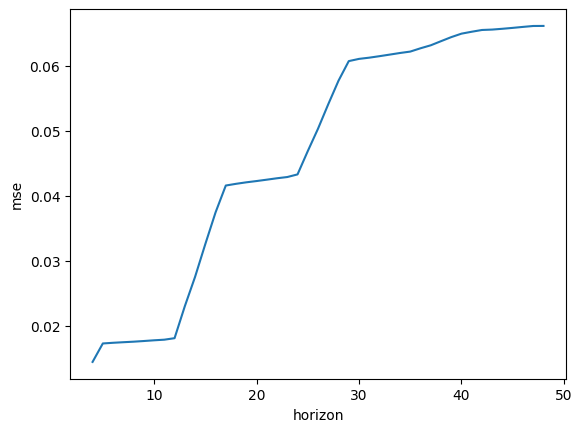

In [113]:
#seabornのlineplot関数を活用し、実際の値と予測値の平均二乗誤差であるmseの推移を可視化

sns.lineplot(x='horizon', y='mse', data=df_p)

#時間の経過とともに、誤差が増加しているが、0.02-0.07の範囲内での増加のため大きな誤差とは判断しがたい

<Axes: xlabel='horizon', ylabel='coverage'>

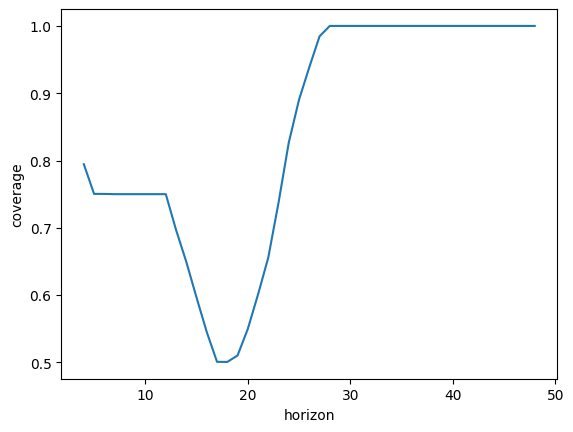

In [114]:
#不確実性区間に予測値が含まれている割合であるcoverageも、推移を可視化
sns.lineplot(x='horizon', y='coverage', data=df_p)


7. 設定したゴールの回答

向こう4年の漁獲量は、減少傾向にありつつも変化が少ないように感じるが、不確実性区間に実際の値が含まれる割合が100%である点、あてにならない分析結果と思われます。
年間漁獲量を強引に日割りにしたデータを使用したことが問題と思うため、勉強して年間の数量から分析する方法を身につけたいと思いました。

とはいえ、「向こう4年の漁獲量の変化が少ない」という自分の分析結果を信じて、引き続き来年のふるさと納税もエゾバフンウニを購入したいと思います。
